# Computer Lab 12


This lab is intended to reinforce ideas about surface and volume integrals, and some of the common simplifications used for these integrals, as well as thinking through parametrization of surfaces.  For this lab it may be useful to have something to write on to do some calculations.

Before starting this lab, please take a moment to fill out the Student Feedback on Subject and Teaching survey.  You should have received a link for this.



## The surface $S_1$
Consider the surface $S_1$ that is parametrized by

$$
\vec{r}(u,v) = u \cos(v) \vec{i}  +  u \sin(v) \vec{j} +\sin(u) \vec{k}
$$
for
$$
\pi \leq u \leq 2\pi \qquad \qquad 0 \leq v \leq 2\pi
$$
In looking at this formula, you should think of cylindrical coordinates where $x = \rho \cos(\theta)$ and $y = \rho \sin(\theta)$.  So what do $u$ and $v$ correspond to in Cylindrical coordinates?

Without running the following code, try to determine what the shape is, following the process below:

A good starting point is to look at the boundaries.  In this case:
- What are the $x$, $y$, and $z$ coordinates for $u = \pi$ and $0 \leq v \leq \pi$?  
- What are the $x$, $y$, and $z$ coordinates for $u = 2\pi$ and $0 \leq v \leq \pi$?

Now let's look at a few values of $v$.

- If $v=0$, what does $z$ look like as $u$ increases from $\pi$ to $2\pi$?

Since $z$ does not depend on $v$, it has the same shape for other values of $v$

From this, can you determine the shape?  Check it with the code below.


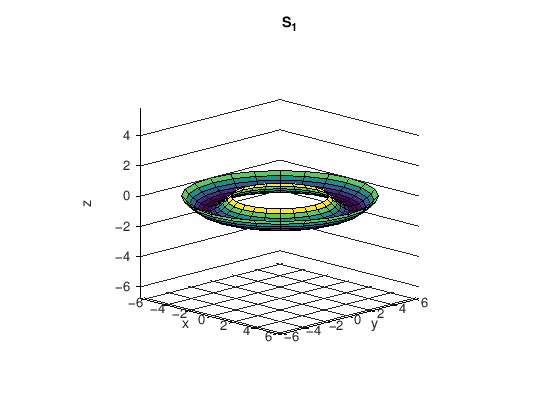

In [5]:
u = [pi: pi/12: 2*pi];
v = [0: pi/12: 2*pi];

[U,V] = meshgrid(u,v);

X = U.*cos(V);
Y = U.*sin(V);
Z = sin(U);

surf(X,Y,Z)
view([45, 15])
xlabel('x')
ylabel('y')
zlabel('z')
axis('equal')
title('S_1')

## The surface $S_2$

Consider the surface $S_2$ defined using the same interpretation for $u$ and $v$:

$$
\vec{r}(u,v) = u \cos(v) \vec{i} + u \sin(v) \vec{j} + 0 \vec{k}
$$

Can you identify this surface without plotting it?

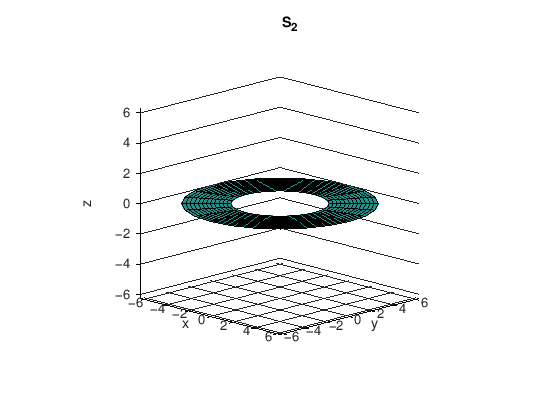

In [4]:
u = [pi: pi/12: 2*pi];
v = [0: pi/12: 2*pi];

[U,V] = meshgrid(u,v);

X = U.*cos(V);
Y = U.*sin(V);
Z = zeros(size(U));

surf(X,Y,Z)
view([45, 15])
xlabel('x')
ylabel('y')
zlabel('z')
axis('equal')
title('S_2')


## The volume between these two surfaces.

We are going to find a round-about way to determine the volume of the region $V$ which lies between these surfaces (the direct way is given in the self-test at the bottom).  We will go about this using the Divergence Theorem.

Consider the vector field given in Cylindrical coordinates:

$$
\vec{F}  = 0.2\vec{e}_\theta + (z-\sin(\rho)) \vec{e}_z
$$
When we consider $\vec{F}$ for an arbitrary point in space, we will use $\rho$, but when we look at $\vec{F}$ at a point on one of the surfaces, we will use the parametrization, replacing $\rho$ by $u$.

Let's consider the vector field for points on $S_1$
In terms of $u$ and $v$ and the Cartesian vectors, $e_\theta = -y\vec{i} + x \vec{j} = -u\sin(v) \vec{i} + u\cos(v) \vec{j}$.  On $S_1$, $z = \sin(u)$, but $u$ is the same thing as $\rho$, so $z-\sin(\rho)=0$.  So $\vec{F}$ can also be written as

$$
\vec{F} = -0.2u\sin(v) \vec{i} + 0.2u\cos(v) \vec{j}  
$$

We now plot it or points on $S_1$.  The plotting interface is not great which makes it difficult to see both on the same plot.  The best view seems to be looking from slightly below.  Please double check  that you can see that $\vec{F}$ is tangent to $S_1$.

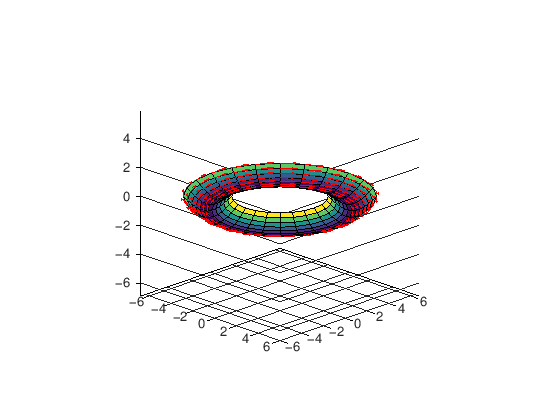

In [6]:
u = [pi: pi/12: 2*pi];
v = [0: pi/12: 2*pi];

[U,V] = meshgrid(u,v);

X = U.*cos(V);
Y = U.*sin(V);
Z = sin(U);
surf(X,Y,Z)
hold on


quiver3(X,Y,Z, -0.2*Y, 0.2*X, Z-sin(U), 0, 'r') 
view([45,-20]) %view from below
axis('equal')

Now we plot $\vec{F}$ on $S_2$.

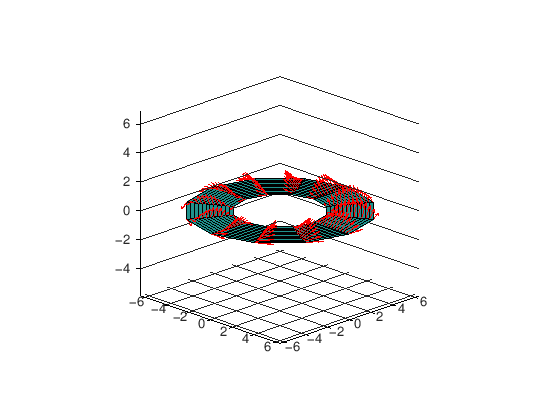

In [7]:
u = [pi: pi/12: 2*pi];
v = [0: pi/6: 2*pi];

[U,V] = meshgrid(u,v);

X = U.*cos(V);
Y = U.*sin(V);
Z = zeros(size(U));
surf(X,Y,Z)
hold on 
quiver3(X,Y,Z, -0.2*Y, 0.2*X,  Z-sin(U), 0, 'r')  %The 0 turns off scaling which makes it difficult to see the length of these vectors.
view([45,20])
axis('equal')


**Question**

Find $\nabla \cdot \vec{F}$ using cylindrical coordinates:

$$
\nabla \cdot \vec{A} = \frac{1}{\rho} \frac{\partial}{\partial \rho} (\rho A_\rho) + \frac{1}{\rho} \frac{\partial A_\theta}{\partial \theta} + \frac{\partial A_z}{\partial z}
$$
Recall $\vec{F} = 0\vec{e}_\rho +  0.2\vec{e}_\theta + (z-\sin(\rho)) \vec{e}_z$
.

.

The answer is below

.

.

.

.

.

.

.

.

.

.

.

.

**Answer:**

$\nabla \cdot \vec{F} = 1$.

### Divergence Theorem

The Divergence Theorem states that

$$
\iint_{S_1} \vec{F} \cdot \vec{n} \, dS + \iint_{S_2} \vec{F} \cdot \vec{n} \, dS = \iiint_V  \nabla \cdot \vec{F} \, dV
$$

**Question**

Why would calculating the left hand side of this help us find the volume of $V$?

.


.

.

.

.

.

.

.

.

.

.

.

.

**Answer:**

The integral of $1$ over $V$ is the volume of $V$.

**Question**

What is the value of $\vec{F}=0.2\vec{e}_\theta + (z-\sin(\rho)) \vec{e}_z$
 on $S_1$?

So what is $\iint_{S_1} \vec{F} \cdot \vec{n} \, dS$?  It is possible (and advisable) to answer this without finding $\vec{n}$ or $dS$.

.

.

.

.

.

.

.

.

.

.

.

.

**Answer:**

We have 
$$
\vec{F} = 0.2 \vec{e}_\theta +  (z - \sin(\rho)) \vec{e}_z
$$
but on the surface $S_1$, $z = \sin(u)=\sin(\rho)$, so the $\vec{e}_z$ coefficient $z-\sin(\rho)$ is $0$.  So
$$
\vec{F} = 0.2 \vec{e}_\theta
$$

The $\vec{e}_\theta$ component is tangent to $S_1$.  

So 
$$\vec{F} \cdot \vec{n} = 0$$
and thus 
$$\iint_{S_1} \vec{F}\cdot \vec{n} \, dS = 0$$

**Question**

What is $\vec{n}$ on $S_2$ and what is $\vec{F} = 0\vec{e}_\rho +  0.2\vec{e}_\theta + (z-\sin(\rho)) \vec{e}_z$ on $S_2$ (recall the relation between $u$ and $\rho$)?

Find $\vec{F} \cdot \vec{n}$.

.

.

.

.

.

.

.

.

.

.

.

.

**Answer:**

On $S_2$, $\vec{n} = \vec{k} = \vec{e}_z$ (it has to point away from the volume, so it is positive).  Since $z=0$ on $S_2$, we have $\vec{F} =\vec{e}_\theta -\sin(u) \vec{e}_z$.  Using the fact that $\vec{e}_\theta$ is perpendicular to $\vec{n}$ we get 
$$\vec{F} \cdot \vec{n} = - \sin(u)$$

So we now have 

\begin{align*}
\iiint_V 1 &= \iint_{S_1} \vec{F}\cdot \vec{n} \, dS + \iint_{S_2} \vec{F} \cdot \vec{n} \, dS\\
&= 0 + \iint_{S_2} -\sin(u) \, dS
\end{align*}

If this were the integral of a constant, the calculation now would be simply to take the area of $S_2$ and multiply by the constant.  But since it is not a constant, we need to do the integral.

To complete the integral over $S_2$, we need to find 

$$
dS = \left \|\frac{\partial{r}}{\partial u} \times \frac{\partial{r}}{\partial v} \right\| \, du \, dv
$$
where 

$$\vec{r} = u\cos(v) \vec{i} + u \sin(v) \vec{j}$$

We have

$$
\frac{\partial r}{\partial u}  = \cos(v) \vec{i} + \sin(v) \vec{j} \qquad \qquad \frac{\partial r}{\partial v} = -u \sin(v) \vec{i} + u \cos(v) \vec{j}
$$
Check that

$$
\left \|\frac{\partial{r}}{\partial u} \times \frac{\partial{r}}{\partial v} \right\| = u
$$
and thus

$$
dS = u \, du \, dv
$$
(you may notice that this is related to $r \, dr \, d\theta$ for polar coordinates.  Can you see why this parametrization should give the same $dS$ as polar coordinates?)

We now have 

$$
\iint_{S_2} \vec{F} \cdot \vec{n} \, dS = -\int_0^{2\pi} \int_{\pi}^{2\pi} \sin(u) u \,du \, dv
$$

Using integration by parts:

$$
\int_a^b u \sin(u)  \, du  = \left[ -u \cos(u) + \sin(u) \right|_{a}^b
$$

the $u$ integeal becomes $-3\pi$.
Plugging this in, the final result is $6 \pi^2$.  So the volume of the region between $S_1$ and $S_2$ is $6\pi^2$

## Self test

A more direct way to find the volume of the region would be to do the integral $\iiint_V 1 \, dV$.  We could do this in cylindrical coordinates, where $dV = \rho \, dz\, d\rho \, d\theta$.
- Why is it important to make the $z$ integral the innermost integral (or at least have it done before the $\rho$ integral)?
- Set this up and do the $z$ integral and confirm that after completing it, you are left the same as the intregral we did above over $S_2$.